<a href="https://colab.research.google.com/github/preethgit/DataScience/blob/main/PROJECT_1_Chennai_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [588]:
#Importing the libraries
import numpy as np
import os
import pandas as pd
import sys
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import seaborn as sns
sns.set(color_codes=True) 
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [467]:
#Importing the dataset
ds = pd.read_csv('train-chennai-sale.csv')
ds.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [468]:
ds['N_BEDROOM'].value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [469]:
ds.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [470]:
ds.isnull().sum(axis=0) # there are some missing values and that needs attention

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [471]:
ds.shape

(7109, 22)

In [472]:
ds.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [473]:
ds.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [474]:
ds = ds.drop(['PRT_ID', 'REG_FEE', 'COMMIS'], axis=1) # dropping columns that are considered to be causing less impact in this house price prediction

In [475]:
ds.head(5)

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


In [476]:
ds.shape # after dropping a few columns, we now only have 19 left

(7109, 19)

**DATA CLEANING COLUMN BY COLUMN**



1.   Check for spelling mistakes
2.   Check for duplicate values
3.   Check missing values
4.   Drop unnccessary columns

**1. AREA**


In [477]:
ds.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [478]:
ds.AREA.value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [479]:
# Correcting the spelling mistakes that are present in the column using replace with the dictionary formatting

ds['AREA'].replace({"Chrompt": "Chrompet", "Chrmpet":"Chrompet", "Chormpet": "Chrompet", "TNagar":"T Nagar","Karapakam":"Karapakkam", "Ana Nagar":"Anna Nagar", "Velchery":"Velachery", "Ann Nagar":"Anna Nagar", "Adyr":"Adyar", "KKNagar":"KK Nagar"}, inplace = True)


In [480]:
ds.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

Text(0.5, 1.0, 'Distribution of column AREA')

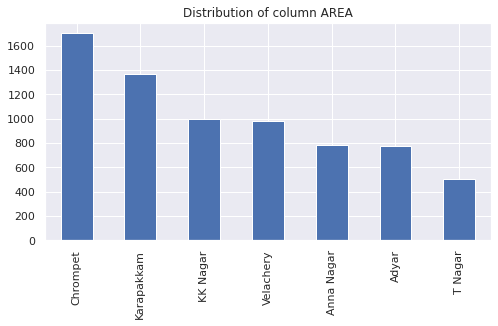

In [481]:
#distribution plot of the column AREA
plt.figure(figsize=(8,4))
ds['AREA'].value_counts().plot(kind='bar');
plt.title('Distribution of column AREA')

**Interpretation:-** This seems clear that the area Chrompet has the most number of houses and TNagar the least from this dataset

In [482]:
# FEATURE vs TARGET variable - AREA vs SALES PRICE


 **2. INT_SQFT**

In [483]:
ds.INT_SQFT.value_counts()

1781    18
1538    15
1505    13
1514    13
1634    12
        ..
559      1
2479     1
1330     1
880      1
598      1
Name: INT_SQFT, Length: 1699, dtype: int64

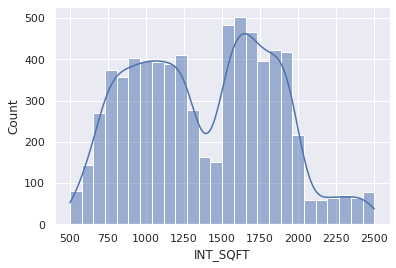

In [484]:
#distribution plot of the column INT_SQFT
sns.histplot(data=ds, x='INT_SQFT', kde= True)

**Interpretation:-** This does not follow any known distributions

**3. DATE_SALE**

In [485]:
#converting date_sale 
ds['DATE_SALE'] = pd.to_datetime(ds['DATE_SALE'])
ds['DATE_BUILD'] = pd.to_datetime(ds['DATE_BUILD'])
ds['AGE_OF_HOUSE'] = ds['DATE_SALE'] - ds['DATE_BUILD']

In [486]:
#we can now drop the DATE_SALE and DATE_BUILD from this dataset since we have the age of the house
ds = ds.drop(['DATE_SALE', 'DATE_BUILD'], axis=1)

In [487]:
ds.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_OF_HOUSE
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,16031 days
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,4015 days
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,7152 days
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,8030 days
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,10802 days


In [488]:
ds.shape # now we have 18 columns after dropping the Date_Sale and Date_Build

(7109, 18)

In [489]:
#distribution plot of the column INT_SQFT
#sns.histplot(data=ds, x='AGE_OF_HOUSE', kde= True)

**4. DIST_MAINROAD**

In [490]:
ds.DIST_MAINROAD.unique()

array([131,  26,  70,  14,  84,  36, 137, 176, 175,  74,  78, 143,  83,
       157, 148, 134,  69, 168,  53,  96, 114, 100, 111, 105,  29,  59,
       185, 138, 173,  15, 117,  16, 130,  46, 180,  52,  86,  49, 113,
       189,  28,  51,  19, 167, 126,  75, 154,  25, 187, 200,  32,  11,
        23,  13,  58,  89,  48,  39, 177, 116,  41, 192,  72,  24,  43,
        85, 171, 149,  73,  62, 145, 125, 121, 129,   6, 103,   8,  50,
        67,   0, 147,  71,  34, 178, 106, 144, 135,  38,  40, 142,  79,
        20,  99, 166,  63,  44,  60,  90, 169,  10, 122, 108,  98,  57,
       104,  17,   1, 109, 164, 136,  97,  37,   9, 181,  93,  81, 193,
        95, 196, 141, 158, 174,  94, 124,  82,  76, 190, 194,  54,  64,
        65, 153, 115, 102,  77, 182, 163,  88,  66, 119,  18, 188, 112,
       120, 159,   4, 123,  31,   2, 156, 184, 170, 110,   7, 152,  27,
       198, 183,  12,  45, 161,  30, 118,  33,  61, 191, 160, 140,  47,
       146, 128,  80,  55, 151,   3,  92,  22,  35, 101, 127, 19

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


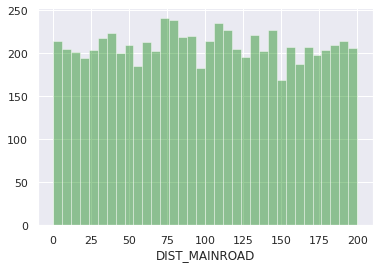

In [491]:
sns.distplot(ds['DIST_MAINROAD'], kde = False, color = 'green', bins=34)

**Interpretation:-** The data points are more or less the same and it is uniformly distributed

**5. N_BEDROOM**

In [492]:
ds.N_BEDROOM.unique()

array([ 1.,  2.,  3.,  4., nan])

In [493]:
ds.N_BEDROOM.value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

Text(0.5, 1.0, 'Distribution of column N_BEDROOM')

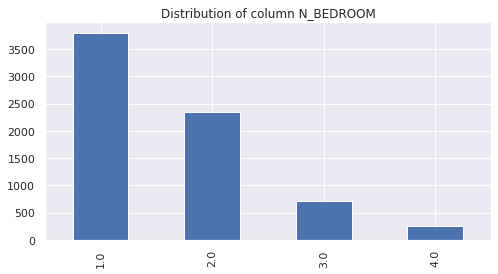

In [494]:
#distribution plot of the column N_BEDROOM
plt.figure(figsize=(8,4))
ds['N_BEDROOM'].value_counts().plot(kind='bar');
plt.title('Distribution of column N_BEDROOM')

**Intepretation:-** The most number of houses available have only one bedroom followed by two bedrooms.

---



**6. N_BATHROOM**

In [495]:
ds.N_BEDROOM.value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [496]:
ds = ds.fillna({"N_BEDROOM": ds["N_BEDROOM"].mode()})

Text(0.5, 1.0, 'Distribution of column N_BATHROOM')

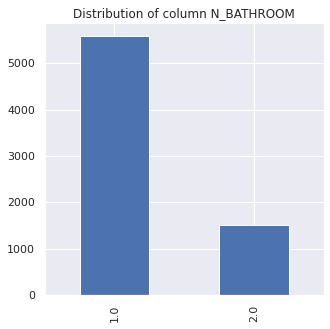

In [497]:
#distribution plot of the column N_BATHROOM
plt.figure(figsize=(5,5))
ds['N_BATHROOM'].value_counts().plot(kind='bar');
plt.title('Distribution of column N_BATHROOM')

**Intepretation:-** The most number of houses available possess only one bathroom

**7. N_ROOM**

In [498]:
ds.N_ROOM.value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

In [499]:
ds = ds.fillna({"N_BEDROOM": ds["N_BEDROOM"].mode()}) # filling the missing data for Bedroom /data should fill it with mode

In [500]:
ds['N_BEDROOM'].isna().sum()  # ?? why the missing values are not reflecting??

1

Text(0.5, 1.0, 'Distribution of column N_ROOM')

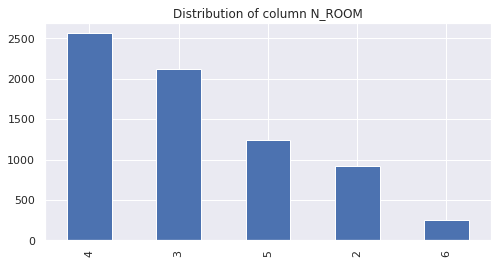

In [501]:
#distribution plot of the column N_ROOM
plt.figure(figsize=(8,4))
ds['N_ROOM'].value_counts().plot(kind='bar');
plt.title('Distribution of column N_ROOM')

**Interpretation:-** Houses present with 4 rooms are a majority 

**8. SALE_COND**

In [502]:
ds.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [503]:
# Correcting the spelling mistakes that are present in the column using replace with the dictionary formatting
ds['SALE_COND'].replace({"Ab Normal": "AbNormal", "Partiall":"Partial", "PartiaLl": "Partial", "Adj Land":"AdjLand"}, inplace = True)

In [504]:
ds.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [505]:
ds.SALE_COND.value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

Text(0.5, 1.0, 'Distribution of column SALE_COND')

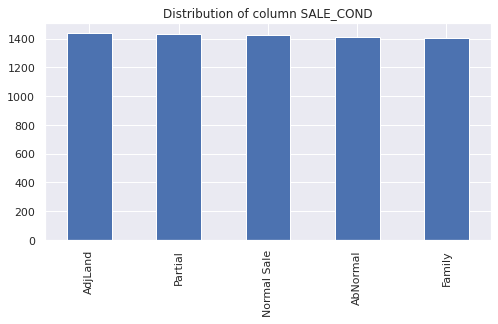

In [506]:
#distribution plot of the column SALE_COND
plt.figure(figsize=(8,4))
ds['SALE_COND'].value_counts().plot(kind='bar');
plt.title('Distribution of column SALE_COND')

**Interpretation:-** All the sale condition are equally distributed

In [507]:
ds.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_OF_HOUSE
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,16031 days
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,4015 days
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,7152 days
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,8030 days
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,10802 days


**9. PARK_FACIL**

In [508]:
ds.PARK_FACIL.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [509]:
ds.PARK_FACIL.value_counts() # correct the Noo vaule to No

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [510]:
ds['PARK_FACIL'].replace({"Noo":"No"}, inplace=True) # replacing the values that are misspelled

In [511]:
ds.PARK_FACIL.value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

Text(0.5, 1.0, 'Distribution of column PARK_FACIL')

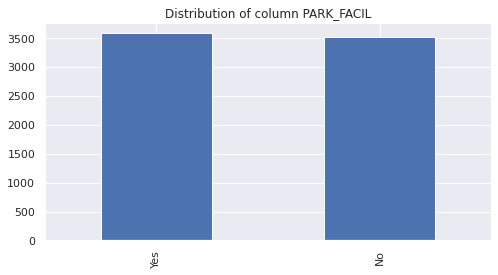

In [512]:
#distribution plot of the column PARK_FACIL
plt.figure(figsize=(8,4))
ds['PARK_FACIL'].value_counts().plot(kind='bar');
plt.title('Distribution of column PARK_FACIL')

**Interpretation:-** The parking facility in the given data is equally distributed, which means the houses with and without parking facility are almost equal

**10. BUILDTYPE**

In [513]:
ds.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [514]:
ds.BUILDTYPE.value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [515]:
ds['BUILDTYPE'].replace({"Other":"Others", "Comercial":"Commercial"}, inplace = True)

In [516]:
ds.BUILDTYPE.value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

Text(0.5, 1.0, 'Distribution of column BUILDTYPE')

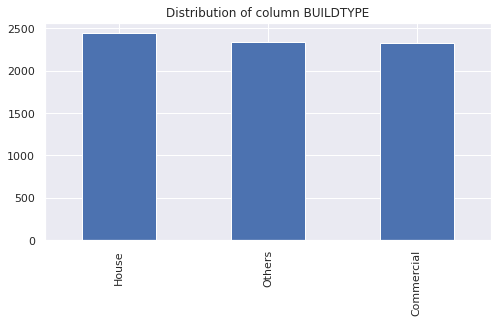

In [517]:
#distribution plot of the column BUILDTYPE
plt.figure(figsize=(8,4))
ds['BUILDTYPE'].value_counts().plot(kind='bar');
plt.title('Distribution of column BUILDTYPE')

**Intepretation:-** The build type HOUSE has slightly more  comapred to OTHERS and COMEMRCIAL properties

**11. UTILITY_AVAIL**

In [518]:
ds.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [519]:
ds.UTILITY_AVAIL.value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [520]:
ds['UTILITY_AVAIL'].replace({"All Pub": "AllPub"}, inplace = True)

In [521]:
ds.UTILITY_AVAIL.value_counts()

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

Text(0.5, 1.0, 'Distribution of column UTILITY_AVAIL')

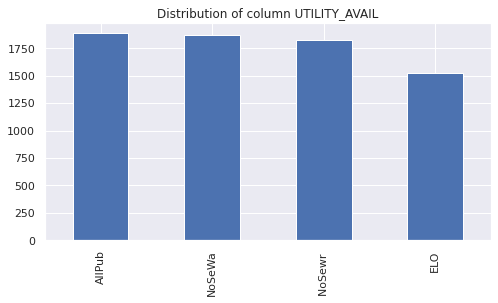

In [522]:
#distribution plot of the column UTILITY_AVAIL
plt.figure(figsize=(8,4))
ds['UTILITY_AVAIL'].value_counts().plot(kind='bar');
plt.title('Distribution of column UTILITY_AVAIL')

**Interpretation:-** Most of the houses have AllPub and NoSeWa equally

**12. STREET**

In [523]:
ds.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [524]:
ds.STREET.value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [525]:
ds['STREET'].replace({"Pavd":"Paved", "NoAccess":"No Access"}, inplace = True)

In [526]:
ds.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

Text(0.5, 1.0, 'Distribution of column STREET')

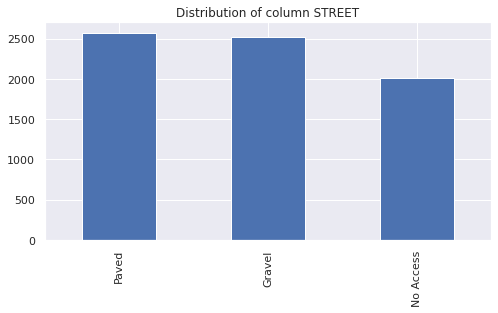

In [527]:
#distribution plot of the column STREET
plt.figure(figsize=(8,4))
ds['STREET'].value_counts().plot(kind='bar');
plt.title('Distribution of column STREET')

**Interpretation:-** This depicts that the paved and gravel streets equally constitute more of the data points, and there are considerable amount houses with No Access streets, which probably buyers might not give a thinking of.

**13. MZ ZONE**

In [528]:
ds.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [529]:
ds.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

Text(0.5, 1.0, 'Distribution of column MZZONE')

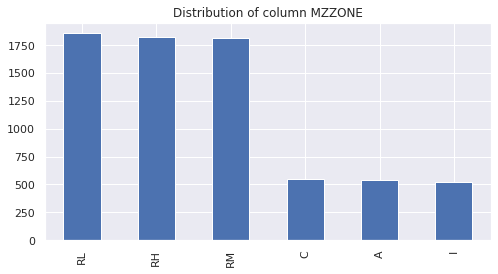

In [530]:
#distribution plot of the column STREET
plt.figure(figsize=(8,4))
ds['MZZONE'].value_counts().plot(kind='bar');
plt.title('Distribution of column MZZONE')

**CHECK FOR DUPLICATES**

In [531]:
ds.duplicated().any() # there are no duplicates in this dataset

False

**CHECK FOR MISSING VALUES**

In [532]:
ds.isna().sum()/ds.shape[0]*100 # finding the percentage of missing values

AREA             0.000000
INT_SQFT         0.000000
DIST_MAINROAD    0.000000
N_BEDROOM        0.014067
N_BATHROOM       0.070333
N_ROOM           0.000000
SALE_COND        0.000000
PARK_FACIL       0.000000
BUILDTYPE        0.000000
UTILITY_AVAIL    0.000000
STREET           0.000000
MZZONE           0.000000
QS_ROOMS         0.000000
QS_BATHROOM      0.000000
QS_BEDROOM       0.000000
QS_OVERALL       0.675200
SALES_PRICE      0.000000
AGE_OF_HOUSE     0.000000
dtype: float64

**Interpretation:-** There are missing values in the N_BEDROOM, N_BATHROOM and QS_OVERALL columns and we nee dto choose the right imputation viz., mean/mode/median

In [533]:
#ds['N_BEDROOM'].mean()
ds['N_BEDROOM'].mode()

0    1.0
dtype: float64

In [534]:
#ds['N_BATHROOM'].mean()
ds['N_BATHROOM'].mode()

0    1.0
dtype: float64

In [535]:
ds['QS_OVERALL'].mean()

3.5032537884152344

In [536]:
ds['N_BEDROOM'] = ds['N_BEDROOM'].replace(np.nan, ds.N_BEDROOM.mode().values[0]) # Imputing the missing values with mode as it is categorical

In [537]:
ds['N_BATHROOM'] = ds['N_BATHROOM'].replace(np.nan, ds.N_BATHROOM.mode().values[0]) # Imputing the missing values with mode

In [538]:
ds['QS_OVERALL'] = ds['QS_OVERALL'].replace(np.nan, ds.QS_OVERALL.mean()) # Imputing the missing values with mean as it is numerical and continuous

In [539]:
ds.isna().sum()/ds.shape[0]*100 # Now there are no missing values, everything is covered

AREA             0.0
INT_SQFT         0.0
DIST_MAINROAD    0.0
N_BEDROOM        0.0
N_BATHROOM       0.0
N_ROOM           0.0
SALE_COND        0.0
PARK_FACIL       0.0
BUILDTYPE        0.0
UTILITY_AVAIL    0.0
STREET           0.0
MZZONE           0.0
QS_ROOMS         0.0
QS_BATHROOM      0.0
QS_BEDROOM       0.0
QS_OVERALL       0.0
SALES_PRICE      0.0
AGE_OF_HOUSE     0.0
dtype: float64

In [540]:
# Converting bedroom and bathroom values to integer
ds['N_BEDROOM'] = ds.N_BEDROOM.apply(int)
ds['N_BATHROOM'] = ds.N_BATHROOM.apply(int)

In [541]:
ds.dtypes

AREA                      object
INT_SQFT                   int64
DIST_MAINROAD              int64
N_BEDROOM                  int64
N_BATHROOM                 int64
N_ROOM                     int64
SALE_COND                 object
PARK_FACIL                object
BUILDTYPE                 object
UTILITY_AVAIL             object
STREET                    object
MZZONE                    object
QS_ROOMS                 float64
QS_BATHROOM              float64
QS_BEDROOM               float64
QS_OVERALL               float64
SALES_PRICE                int64
AGE_OF_HOUSE     timedelta64[ns]
dtype: object

In [542]:
ds.head(10)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_OF_HOUSE
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,16031 days
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,4015 days
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,7152 days
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,8030 days
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,10802 days
5,Chrompet,1220,36,2,1,4,Partial,No,Commercial,NoSeWa,No Access,RH,4.5,2.6,3.1,3.320,12394750,1796 days
6,Chrompet,1167,137,1,1,3,Partial,No,Others,AllPub,No Access,RL,3.6,2.1,2.5,2.670,8488790,10013 days
7,Velachery,1847,176,3,2,5,Family,No,Commercial,AllPub,Gravel,RM,2.4,4.5,2.1,3.260,16800250,3650 days
8,Chrompet,771,175,1,1,2,AdjLand,No,Others,NoSewr,Paved,RM,2.9,3.7,4.0,3.550,8308970,12469 days
9,Velachery,1635,74,2,1,4,AbNormal,No,Others,ELO,No Access,I,3.1,3.1,3.3,3.160,8083650,5475 days


In [543]:
#There is a need to convert the age of house to numeric by removing the days
ds['AGE_OF_HOUSE'] = ds['AGE_OF_HOUSE'].astype(str).str[:-4]

In [544]:
ds.head(10) # checking if the word days is removed from the age column

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_OF_HOUSE
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,16031
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,4015
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,7152
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,8030
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,10802
5,Chrompet,1220,36,2,1,4,Partial,No,Commercial,NoSeWa,No Access,RH,4.5,2.6,3.1,3.320,12394750,1796
6,Chrompet,1167,137,1,1,3,Partial,No,Others,AllPub,No Access,RL,3.6,2.1,2.5,2.670,8488790,10013
7,Velachery,1847,176,3,2,5,Family,No,Commercial,AllPub,Gravel,RM,2.4,4.5,2.1,3.260,16800250,3650
8,Chrompet,771,175,1,1,2,AdjLand,No,Others,NoSewr,Paved,RM,2.9,3.7,4.0,3.550,8308970,12469
9,Velachery,1635,74,2,1,4,AbNormal,No,Others,ELO,No Access,I,3.1,3.1,3.3,3.160,8083650,5475


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


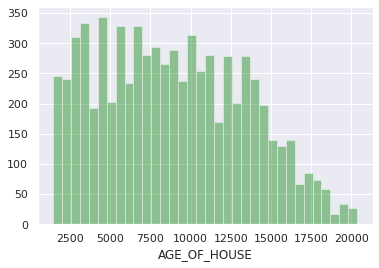

In [545]:
sns.distplot(ds['AGE_OF_HOUSE'], kde = False, color = 'green', bins=34) # this value is in days

**EDA**

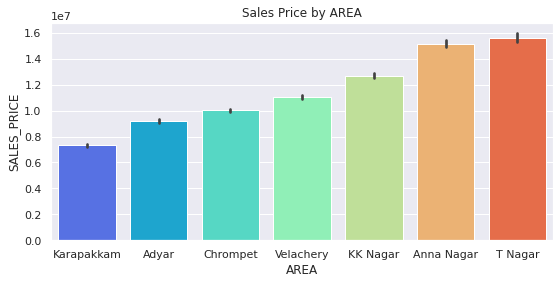

In [546]:
# AREA vs SALES_PRICE
plt.figure(figsize=(9,4))
sns.barplot(x='AREA',y='SALES_PRICE', data = ds, palette='rainbow', order = ds[['AREA','SALES_PRICE']].groupby('AREA').mean().sort_values('SALES_PRICE').reset_index().AREA)
plt.title("Sales Price by AREA")
plt.show()

**Interpretation:-** 


1.   There is a relation between area and sales price. T Nagar and Anna Nagar are the most expensive areas with Karapakkam being the least. Area is an important feature
2.   Yes, there is a linear relationship between this feature and target
3. We need to do  label encoding as this is a categorical variable and has linear relationship



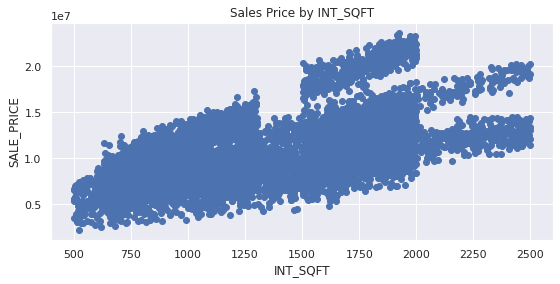

In [547]:
# INT_SQFT vs SALES_PRICE
plt.figure(figsize=(9,4))
plt.scatter(ds['INT_SQFT'], ds['SALES_PRICE'])
plt.xlabel('INT_SQFT')
plt.ylabel('SALE_PRICE')
plt.title("Sales Price by INT_SQFT")
plt.show()

**Interpretation:-**
1. There is a relation between sqft of the house and sales price. As the sqft increases the price of the house also increases.
2. Yes, there is a linear relationship between sqft and sales price as we can see a linear trend 
3. No encoding is required for this feature
4. The sqft ranges from 500 to 2500

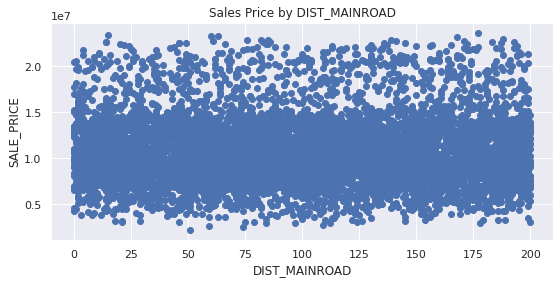

In [548]:
# DIST_MAINROAD vs SALES_PRICE
plt.figure(figsize=(9,4))
plt.scatter(ds['DIST_MAINROAD'], ds['SALES_PRICE'])
plt.xlabel('DIST_MAINROAD')
plt.ylabel('SALE_PRICE')
plt.title("Sales Price by DIST_MAINROAD")
plt.show()

**Interpretation:-**
1. There is no relation between dsitance from the mainroad and sales price
2. Yes, there is no linear relationship between this feature and target
3. No encoding is required for this feature, maybe we can drop it

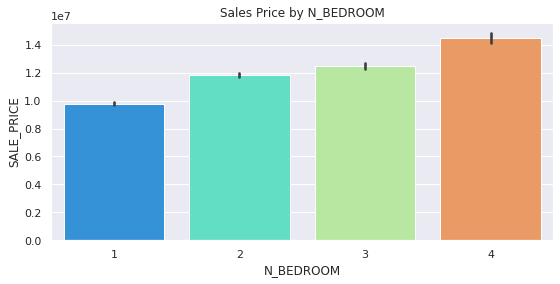

In [549]:
# N_BEDROOM vs SALES_PRICE
plt.figure(figsize=(9,4))
sns.barplot(x='N_BEDROOM',y='SALES_PRICE', data = ds, palette='rainbow', order = ds[['N_BEDROOM','SALES_PRICE']].groupby('N_BEDROOM').mean().sort_values('SALES_PRICE').reset_index().N_BEDROOM)
#plt.scatter(ds['N_BEDROOM'], ds['SALES_PRICE'])
plt.xlabel('N_BEDROOM')
plt.ylabel('SALE_PRICE')
plt.title("Sales Price by N_BEDROOM")
plt.show()

**Interpretation:-** 


1.   There is a relation between number of bedrooms and sales price. As the number increases the sales price increases as well. N_BEDROOM is an important feature
2.   Yes, there is a linear relationship between this feature and target
3. We do not need any encoding


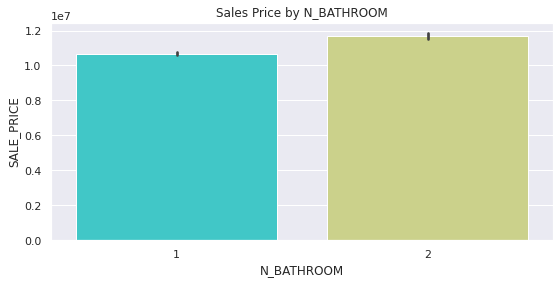

In [550]:
# N_BATHROOM vs SALES_PRICE
plt.figure(figsize=(9,4))
sns.barplot(x='N_BATHROOM',y='SALES_PRICE', data = ds, palette='rainbow', order = ds[['N_BATHROOM','SALES_PRICE']].groupby('N_BATHROOM').mean().sort_values('SALES_PRICE').reset_index().N_BATHROOM)
#plt.scatter(ds['N_BATHROOM'], ds['SALES_PRICE'])
plt.xlabel('N_BATHROOM')
plt.ylabel('SALE_PRICE')
plt.title("Sales Price by N_BATHROOM")
plt.show()

**Interpretation:-** 

1.   There is a relation between number of bathrooms and sales price. As the number increases the sales price increases as well. N_BATHROOM is also an important feature
2.   Yes, there is a linear relationship between this feature and target
3. We do not need any encoding

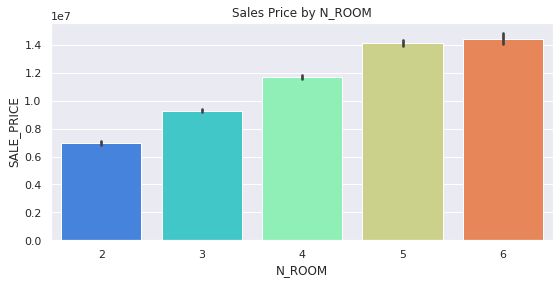

In [551]:
# N_ROOM vs SALES_PRICE
plt.figure(figsize=(9,4))
sns.barplot(x='N_ROOM',y='SALES_PRICE', data = ds, palette='rainbow', order = ds[['N_ROOM','SALES_PRICE']].groupby('N_ROOM').mean().sort_values('SALES_PRICE').reset_index().N_ROOM)
plt.xlabel('N_ROOM')
plt.ylabel('SALE_PRICE')
plt.title("Sales Price by N_ROOM")
plt.show()

**Interpretation:-** 

1.   There is a relation between number of rooms and sales price. As the number of rooms in ahouse increases the sales price increases as well. N_ROOM is also an important feature
2.   Yes, there is a linear relationship between this feature and target
3. We do not need any encoding

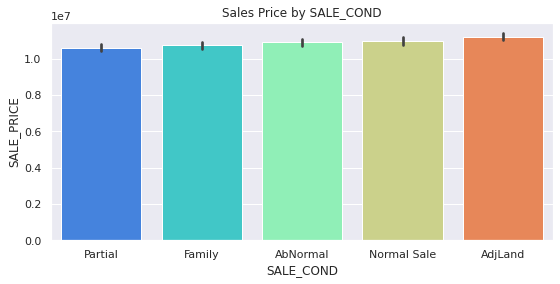

In [552]:
# SALE_COND vs SALES_PRICE
plt.figure(figsize=(9,4))
sns.barplot(x='SALE_COND',y='SALES_PRICE', data = ds, palette='rainbow', order = ds[['SALE_COND','SALES_PRICE']].groupby('SALE_COND').mean().sort_values('SALES_PRICE').reset_index().SALE_COND)
plt.xlabel('SALE_COND')
plt.ylabel('SALE_PRICE')
plt.title("Sales Price by SALE_COND")
plt.show()

**Interpretation:-** 

1.   There is a relation between sale condition and sales price. SALE_COND is also an important feature
2.   Yes, there is a linear relationship between this feature and target
3. We need to do label encoding for this feature as it is a categorical variable and has a linear relationship

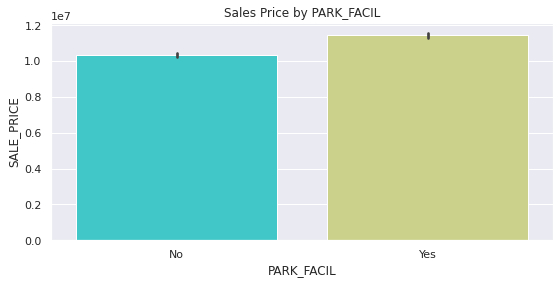

In [553]:
# PARK_FACIL vs SALES_PRICE
plt.figure(figsize=(9,4))
sns.barplot(x='PARK_FACIL',y='SALES_PRICE', data = ds, palette='rainbow', order = ds[['PARK_FACIL','SALES_PRICE']].groupby('PARK_FACIL').mean().sort_values('SALES_PRICE').reset_index().PARK_FACIL)
plt.xlabel('PARK_FACIL')
plt.ylabel('SALE_PRICE')
plt.title("Sales Price by PARK_FACIL")
plt.show()

**Interpretation:-** 

1.   There is a relation between parking facility and sales price. PARK_FACIL is also an important feature
2.   Yes, there is a linear relationship between this feature and target
3. We need to do label encoding for this feature as it is a binary categorical variable

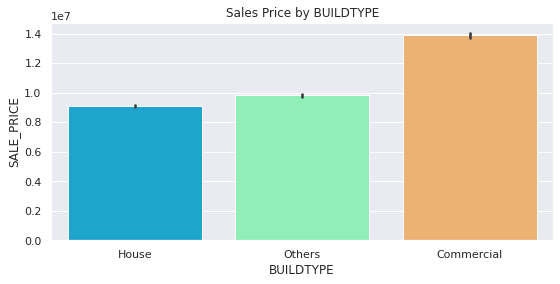

In [554]:
# BUILDTYPE vs SALES_PRICE
plt.figure(figsize=(9,4))
sns.barplot(x='BUILDTYPE',y='SALES_PRICE', data = ds, palette='rainbow', order = ds[['BUILDTYPE','SALES_PRICE']].groupby('BUILDTYPE').mean().sort_values('SALES_PRICE').reset_index().BUILDTYPE)
plt.xlabel('BUILDTYPE')
plt.ylabel('SALE_PRICE')
plt.title("Sales Price by BUILDTYPE")
plt.show()

**Interpretation:-** 

1.   There is a relation between build type and sales price. BUILDTYPE is also an important feature
2.   Yes, there is a no linear relationship between this feature and target
3. We need to do one hot encoding

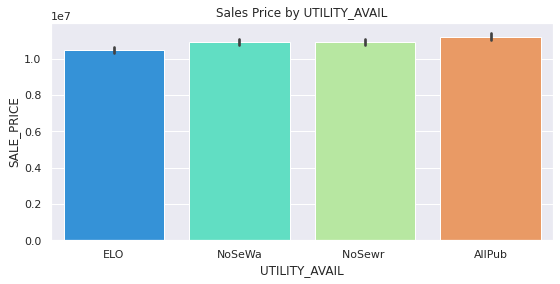

In [555]:
# UTILITY_AVAIL vs SALES_PRICE
plt.figure(figsize=(9,4))
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE', data = ds, palette='rainbow', order = ds[['UTILITY_AVAIL','SALES_PRICE']].groupby('UTILITY_AVAIL').mean().sort_values('SALES_PRICE').reset_index().UTILITY_AVAIL)
plt.xlabel('UTILITY_AVAIL')
plt.ylabel('SALE_PRICE')
plt.title("Sales Price by UTILITY_AVAIL")
plt.show()

**Interpretation:-** 

1.   There is a relation between utilities available and sales price. UTILITY_AVAIL is also an important feature
2.   Yes, there is a linear relationship between this feature and target
3. We need to do label encoding for this feature as it is a categorical variable and has linear relationship

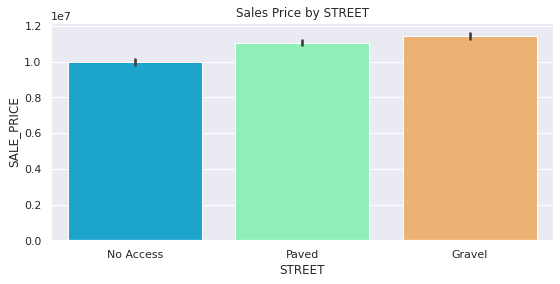

In [556]:
# STREET vs SALES_PRICE
plt.figure(figsize=(9,4))
sns.barplot(x='STREET',y='SALES_PRICE', data = ds, palette='rainbow', order = ds[['STREET','SALES_PRICE']].groupby('STREET').mean().sort_values('SALES_PRICE').reset_index().STREET)
plt.xlabel('STREET')
plt.ylabel('SALE_PRICE')
plt.title("Sales Price by STREET")
plt.show()

**Interpretation:-** 

1.   There is a relation between Street type and sales price. STREET is also an important feature
2.   Yes, there is a linear relationship between this feature and target
3. We need to do label encoding for this feature as it is a categorical variable and has linear relationship

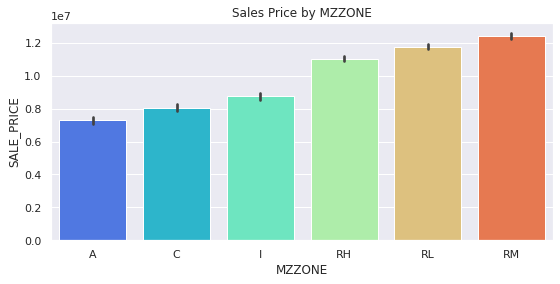

In [557]:
# MZZONE vs SALES_PRICE
plt.figure(figsize=(9,4))
sns.barplot(x='MZZONE',y='SALES_PRICE', data = ds, palette='rainbow', order = ds[['MZZONE','SALES_PRICE']].groupby('MZZONE').mean().sort_values('SALES_PRICE').reset_index().MZZONE)
plt.xlabel('MZZONE')
plt.ylabel('SALE_PRICE')
plt.title("Sales Price by MZZONE")
plt.show()

**Interpretation:-** 

1.   There is a relation between MZZONE and sales price. MZZONE is also an important feature
2.   Yes, there is a linear relationship between this feature and target
3. We need to do label encoding for this feature as it is a categorical variable and has linear relationship

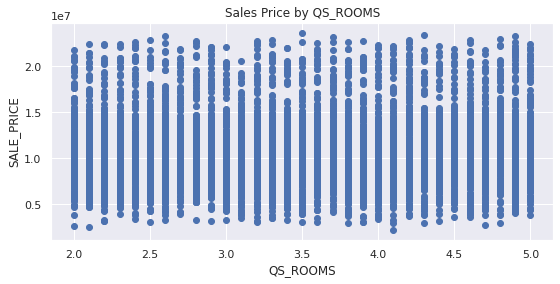

In [558]:
# QS_ROOMS vs SALES_PRICE - check with Koushik if this it the right plot??
plt.figure(figsize=(9,4))
#sns.barplot(x='QS_ROOMS',y='SALES_PRICE', data = ds, palette='rainbow', order = ds[['QS_ROOMS','SALES_PRICE']].groupby('QS_ROOMS').mean().sort_values('SALES_PRICE').reset_index().QS_ROOMS)
plt.scatter(ds['QS_ROOMS'], ds['SALES_PRICE'])
plt.xlabel('QS_ROOMS')
plt.ylabel('SALE_PRICE')
plt.title("Sales Price by QS_ROOMS")
plt.show()

**Interpretation:-** 

1.   There is no relation between QS_ROOMS and sales price. QS_ROOMS is not an important feature, so we can drop it
2.   Yes, there is no linear relationship between this feature and target

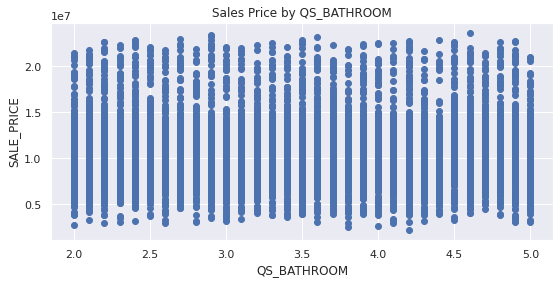

In [559]:
# QS_BATHROOM vs SALES_PRICE - check with Koushik if this it the right plot??
plt.figure(figsize=(9,4))
#sns.barplot(x='QS_BATHROOM',y='SALES_PRICE', data = ds, palette='rainbow', order = ds[['QS_BATHROOM','SALES_PRICE']].groupby('QS_BATHROOM').mean().sort_values('SALES_PRICE').reset_index().QS_BATHROOM)
plt.scatter(ds['QS_BATHROOM'], ds['SALES_PRICE'])
plt.xlabel('QS_BATHROOM')
plt.ylabel('SALE_PRICE')
plt.title("Sales Price by QS_BATHROOM")
plt.show()

**Interpretation:-** 

1.   There is no relation between QS_BATHROOM and sales price. QS_BATHROOM is not an important feature, so we can drop it
2.   Yes, there is no linear relationship between this feature and target

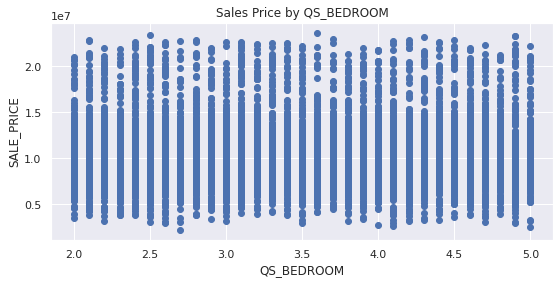

In [560]:
# QS_BEDROOM vs SALES_PRICE - check with Koushik if this it the right plot??
plt.figure(figsize=(9,4))
#sns.barplot(x='QS_BEDROOM',y='SALES_PRICE', data = ds, palette='rainbow', order = ds[['QS_BEDROOM','SALES_PRICE']].groupby('QS_BEDROOM').mean().sort_values('SALES_PRICE').reset_index().QS_BEDROOM)
plt.scatter(ds['QS_BEDROOM'], ds['SALES_PRICE'])
plt.xlabel('QS_BEDROOM')
plt.ylabel('SALE_PRICE')
plt.title("Sales Price by QS_BEDROOM")
plt.show()

**Interpretation:-** 

1.   There is no relation between QS_BEDROOM and sales price. QS_BEDROOM is not an important feature, so we can drop it
2.   Yes, there is no linear relationship between this feature and target

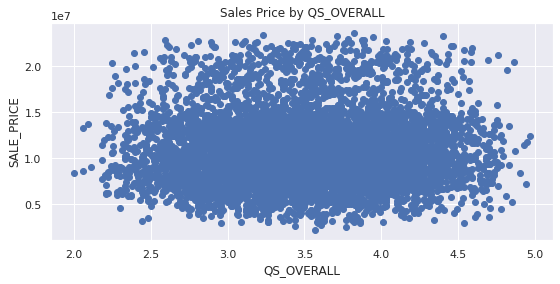

In [561]:
# QS_OVERALL vs SALES_PRICE - check with Koushik if this it the right plot??
plt.figure(figsize=(9,4))
#sns.barplot(x='QS_OVERALL',y='SALES_PRICE', data = ds, palette='rainbow', order = ds[['QS_OVERALL','SALES_PRICE']].groupby('QS_OVERALL').mean().sort_values('SALES_PRICE').reset_index().QS_OVERALL)
plt.scatter(ds['QS_OVERALL'], ds['SALES_PRICE'])
plt.xlabel('QS_OVERALL')
plt.ylabel('SALE_PRICE')
plt.title("Sales Price by QS_OVERALL")
plt.show()

**Interpretation:-** 

1.   There is no relation between QS_OVERALL and sales price. QS_OVERALL is not an important feature, so we can drop it
2.   Yes, there is no linear relationship between this feature and target

In [562]:
ds = ds.drop(['QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL'], axis=1)

In [563]:
ds.head(10)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_OF_HOUSE
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,7600000,16031
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,21717770,4015
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,13159200,7152
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,9630290,8030
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,7406250,10802
5,Chrompet,1220,36,2,1,4,Partial,No,Commercial,NoSeWa,No Access,RH,12394750,1796
6,Chrompet,1167,137,1,1,3,Partial,No,Others,AllPub,No Access,RL,8488790,10013
7,Velachery,1847,176,3,2,5,Family,No,Commercial,AllPub,Gravel,RM,16800250,3650
8,Chrompet,771,175,1,1,2,AdjLand,No,Others,NoSewr,Paved,RM,8308970,12469
9,Velachery,1635,74,2,1,4,AbNormal,No,Others,ELO,No Access,I,8083650,5475


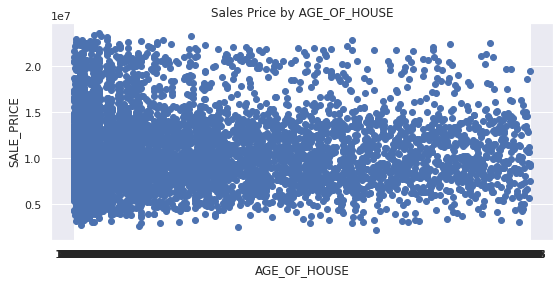

In [564]:
# AGE_OF_HOUSE vs SALES_PRICE - check with Koushik if this it the right plot??
plt.figure(figsize=(9,4))
#sns.barplot(x='AGE_OF_HOUSE',y='SALES_PRICE', data = ds, palette='rainbow', order = ds[['AGE_OF_HOUSE','SALES_PRICE']].groupby('AGE_OF_HOUSE').mean().sort_values('SALES_PRICE').reset_index().AGE_OF_HOUSE)
plt.scatter(ds['AGE_OF_HOUSE'], ds['SALES_PRICE'])
plt.xlabel('AGE_OF_HOUSE')
plt.ylabel('SALE_PRICE')
plt.title("Sales Price by AGE_OF_HOUSE")
plt.show()


#
#var = 'SALES_PRICE'
#data = pd.concat([ds['AGE_OF_HOUSE'], ds[var]], axis=1)
#data.plot.scatter(x=var, y='AGE_OF_HOUSE'); 

**Interpretation:-** 

1.   There is a relation between the age of house and sales price. The lesser the age of the house more the sales price. AGE_OF_HOUSE is also an important feature
2.   Yes, there is a linear relationship between this feature and target
3. We do not require eny encoding for this feature

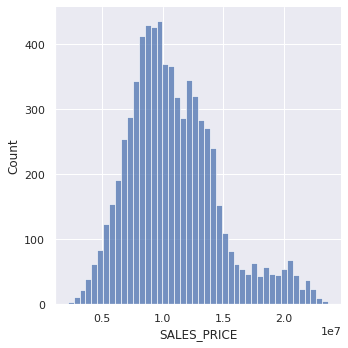

In [565]:
sns.displot(ds['SALES_PRICE'], kde=False)

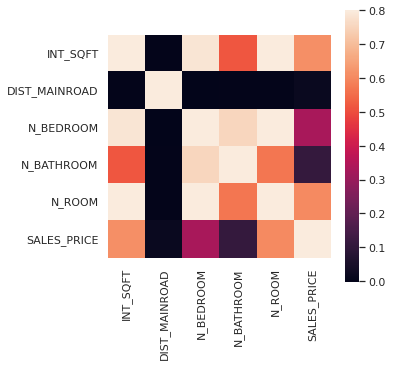

In [566]:
corr = ds.corr()
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corr, vmax=.8, square=True);

In [567]:
ds.dtypes # since the datatypes are not numeric for certain columns, it needs encoding to fit in

AREA             object
INT_SQFT          int64
DIST_MAINROAD     int64
N_BEDROOM         int64
N_BATHROOM        int64
N_ROOM            int64
SALE_COND        object
PARK_FACIL       object
BUILDTYPE        object
UTILITY_AVAIL    object
STREET           object
MZZONE           object
SALES_PRICE       int64
AGE_OF_HOUSE     object
dtype: object

**ENCODING**

In [568]:
ds.head(2)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_OF_HOUSE
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,7600000,16031
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,21717770,4015


In [569]:
pd.DataFrame(ds.dtypes.value_counts()).T

,object,int64
0,8,6


In [570]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [571]:
ds['PARK_FACIL']=le.fit_transform(ds['PARK_FACIL'])
ds['AREA']=le.fit_transform(ds['AREA'])
ds['BUILDTYPE']=le.fit_transform(ds['BUILDTYPE'])
ds['SALE_COND']=le.fit_transform(ds['SALE_COND'])
ds['UTILITY_AVAIL']=le.fit_transform(ds['UTILITY_AVAIL'])
ds['STREET']=le.fit_transform(ds['STREET'])
ds['MZZONE']=le.fit_transform(ds['MZZONE'])

In [572]:
ds.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_OF_HOUSE
0,4,1004,131,1,1,3,0,1,0,0,2,0,7600000,16031
1,1,1986,26,2,1,5,0,0,0,0,0,3,21717770,4015
2,0,909,70,1,1,3,0,1,0,1,0,4,13159200,7152
3,6,1855,14,3,2,5,2,0,2,3,2,2,9630290,8030
4,4,1226,84,1,1,3,0,1,2,0,0,1,7406250,10802


In [573]:
X=ds.drop(['SALES_PRICE'],axis=1)
y=ds['SALES_PRICE']

In [574]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5687, 13), (1422, 13), (5687,), (1422,))

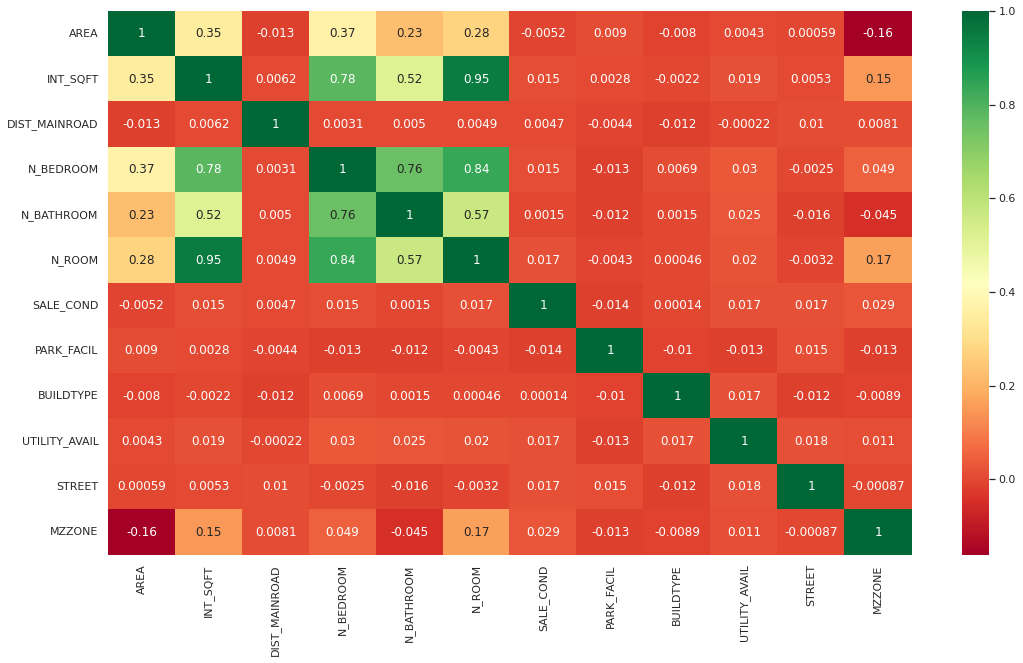

In [575]:
plt.figure(figsize=(18,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True,cmap='RdYlGn')
plt.show()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE
SALES_PRICE,-0.019138,0.612125,0.018783,0.330987,0.108834,0.60276,-0.030732,0.146428,-0.436276,-0.015913,-0.042652,0.427789,1.0


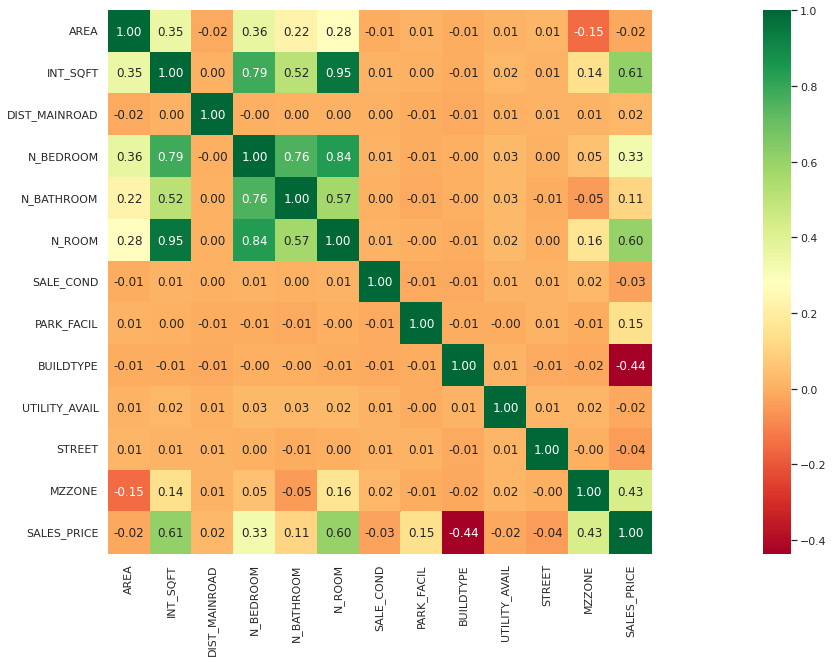

In [577]:
#correlation matrix with target value
corrmat = ds.corr()
plt.figure(figsize=(40, 10))
sns.heatmap(corrmat, cbar=True, fmt='.2f', annot=True, cmap='RdYlGn', square=True)
i=pd.DataFrame(ds[ds.columns[:]].corr()['SALES_PRICE'][:]).T
i=i.iloc[0]
pd.DataFrame(i).T

In [580]:
scaler=StandardScaler()
minmax=MinMaxScaler()

In [581]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [583]:
#CROSS VALIDATION CHECK

lr_model = LinearRegression()
xg_model= xgb.XGBRegressor(colsample_bytree=0.4, gamma=2, learning_rate=0.01,
                 max_depth=4, min_child_weight=1.5, n_estimators=10000,) 
rf = RandomForestRegressor(n_estimators= 1000, max_depth = 4, max_features='sqrt')

In [584]:
CV_LR = cross_val_score(lr_model,X_train_scaled,y_train,cv=10).mean()

In [ ]:
CV_XGB = cross_val_score(xg_model,X_train_scaled,y_train,cv=10).mean()

In [586]:
CV_RForest = cross_val_score(rf,X_train_scaled,y_train,cv=10).mean()

In [587]:
print(CV_LR, CV_XGB, CV_RForest)  

0.7928052925640652 0.9990913317801151 0.8225362959885697


*INTERPRETATION WITH CROSS VALIDATION* **THE CROSS VALIDATION OF XGBOOST IS THE HIGHEST COMPARED TO OTHER TWO MODELS**

In [591]:
# LINEAR REGRESSION - MODEL 1  -- 0.7888573119695858

lr_model.fit(X_train, y_train)
lr_model_y_pred=lr_model.predict(X_test)
print(r2_score(y_test, lr_model_y_pred))

0.7888573119695858


In [592]:
# XGBOOST - MODEL 2 -- 0.999150604728546

xg_model= xgb.XGBRegressor(colsample_bytree=0.4, gamma=2, learning_rate=0.01,
                           max_depth=4, min_child_weight=1.5, n_estimators=10000,)
xg_model.fit(X_train_scaled, y_train)
xg_y_pred=xg_model.predict(X_test_scaled)
print(r2_score(y_test, xg_y_pred))

[22:09:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.999150604728546


In [593]:
# RANDOM FOREST - MODEL 3 --  0.8178196537790137
rf = RandomForestRegressor(n_estimators= 1000, max_depth = 4, max_features='sqrt')
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(r2_score(y_test, rf_pred))

0.8178196537790137


In [595]:
# ENSEMBLE TECHNIQUE - MODEL 4 -- 0.9719012625648318
ml1 = LinearRegression()
ml2 = RandomForestRegressor(random_state=1)
ml3 = GradientBoostingRegressor(random_state=1)
ml4 = DecisionTreeRegressor(random_state=1)

In [596]:
ensemble_model = VotingRegressor(estimators = [('LinearReg', ml1), ('RandomForest', ml2), ('GradientBoost', ml3), ('DecisionTree', ml4)])
ensemble_model.fit(X_train, y_train)
ensemble_ypred = ensemble_model.predict(X_test)
print(r2_score(y_test, ensemble_ypred))

0.9719012625648318


**RESULTS: RSQUARED Values**

1.   LINEAR REGRESSION   - 0.7888573119695858
2.   XGBOOST             - ***0.999150604728546***
3.   RANDOM FOREST       - 0.8178196537790137
4.   ENSEMBLE TECHNIQUE  - 0.9719012625648318


IT IS EVIDENT THAT THE **BEST MODEL** OUT OF THESE **IS** **XGBOOST** as it has the Rsquared valued close to 1

***INTERPRETATION:-***
Commercial buildings are the type of building that anybody would want to construct and they would need to prefer T Nagar location because the selling price of these building are the highest compared to other areas. Ofcourse, this building should possess parking facility. The type of street to the building that could fetch you more money are of gravel type streets and apparently there should not be any building with no access to them. Any buyer will want a house with all facilities, the area suggestion for buyers to lookout will be Karapakkam as that is the least on the sales price of the build type 'house'.